# Fragment-Lead Pairs: A first look

In [113]:
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent4


In [114]:
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator
import useful_rdkit_utils as uru
from rdkit import DataStructs

sns.set(rc = {'figure.figsize':(15,8)})

In [147]:
fragment_lead_pairs = pd.read_csv('data/fragment_lead_pairs.csv')

In [148]:
fragment_lead_pairs

,Year,Table_Entry,Fragment,Lead
0,2022,1,Nc1cc(c[nH]c1=O)C(F)(F)F,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1
1,2022,2,CN1C[C@@H](O)[C@H](C1=O)c2ccc(C)cc2,COc1ccc(CN2C[C@H](O)[C@](CCC(C)C)(C2=O)c3ccc(c...
2,2022,3,Fc1cncc(c1)N2C(=O)N[C@@H](Cc3ccccc3)C2=O,Clc1ccccc1C2CC3(C2)NC(=O)N(C3=O)c4cncc5ccccc45
3,2022,4,c1ccc(cc1)c2ccccc2c3nnn[nH]3,Cc1ccc(cc1)c2cccc(c2c3nnn[nH]3)S(=O)(=O)N
4,2022,5,CN(C)C(=O)C(N)Cc1ccc(F)cc1,Clc1ccc(cc1)[C@H]2CN[C@H](C2)C(=O)N3CCN(CC3)c4...
...,...,...,...,...
162,2016,23,CC1Cn2c(cc3cccc(S1)c23)C(=O)O,Cc1cc(OCCCc2c(C(=O)O)n3CCCc4c(Cl)ccc2c43)cc(C)...
163,2016,24,COC(=O)[C@@H](N)Cc1c[nH]c2ccccc12,Clc1sc(cc1Br)S(=O)(=O)NCCc2c[nH]c3ccccc23
164,2016,25,OC(=O)c1cc(c2ccccc2)n(n1)c3ccccc3,OC(=O)c1ccc(o1)c2ccc(Cl)c(c2)C(=S)NCc3ccc(cc3)...
165,2016,26,O=C(CN1CCNCC1)N2CCCCC2,COC[C@H]1CN[C@H](C)CN1CC(=O)N2CC(C)(C)c3cnc(Cc...


In [117]:
initial_fragment_smiles, lead_smiles = fragment_lead_pairs['Fragment'][0], fragment_lead_pairs['Lead'][0]

In [118]:
os.environ["SMILES"] = initial_fragment_smiles
command = f'python3 generate_analogs.py --toml_file sampling.toml --smiles \'{initial_fragment_smiles}\' --dock'
# subprocess.run(command, check=True)

In [119]:
initial_fragment_smiles, lead_smiles

('Nc1cc(c[nH]c1=O)C(F)(F)F', 'N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1')

#### Run the following command:

`python3 generate_analogs.py --input_frag 'Nc1cc(c[nH]c1=O)C(F)(F)F' --lead 'N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1' --dock`

In [120]:
analogs = pd.read_csv('data/dataframe.csv')

analogs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [122]:
print(analogs.shape)
analogs

(2440, 4)


,SMILES,Input_SMILES,Tanimoto,Prior
0,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1,Nc1cc(c[nH]c1=O)C(F)(F)F,NaN,NaN
1,CC(C)(C)c1c[nH]c(=O)c(N)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.550000,similarity
2,CCc1c(C)[nH]c(=O)c(C)c1C,Nc1cc(C(F)(F)F)c[nH]c1=O,0.127273,scaffold
3,Cc1cc(C(C)C)c(N)c(=O)[nH]1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.215686,scaffold_generic
4,Nc1cc(C(F)(F)F)c(C(F)(F)F)[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.420000,mmp
...,...,...,...,...
2435,Cc1cc(C(C)(C)C)c(=O)[nH]c1N(C)C,Nc1cc(C(F)(F)F)c[nH]c1=O,0.185185,scaffold_generic
2436,Cc1cc(NC(=O)C(C)C)c(=O)[nH]c1C,Nc1cc(C(F)(F)F)c[nH]c1=O,0.176471,scaffold_generic
2437,O=C(Nc1cc(C(F)(F)F)c[nH]c1=O)C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.203704,scaffold_generic
2438,Cc1ccc(=O)n(C)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.128571,scaffold_generic


In [123]:
analogs['Tanimoto'].mean()

0.38899666260674115

In [124]:
print(lead_smiles in analogs['SMILES'][1:].to_list())

False


## Visualizing the Distribution

In [125]:
smiles = analogs['SMILES'][1:].to_numpy()

mols = [Chem.MolFromSmiles(smile) for smile in smiles]

initial_fragment = Chem.MolFromSmiles(initial_fragment_smiles)
lead_mol = Chem.MolFromSmiles(lead_smiles)

In [126]:
fpgen = AllChem.GetMorganGenerator()

fingerprints = np.array([fpgen.GetFingerprint(mol).ToList() for mol in mols])

initial_fragment_fp = np.array([fpgen.GetFingerprint(initial_fragment)])
lead_fp = np.array([fpgen.GetFingerprint(lead_mol).ToList()])

X = np.vstack((initial_fragment_fp, fingerprints, lead_fp))

In [127]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [128]:
pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

In [155]:
analogs['PC1'], analogs['PC2'], analogs['PC3'] = pca_fps.T[0][1:], pca_fps.T[1][1:], pca_fps.T[2][1:]

In [162]:
medium_sim = analogs.query('Prior == ["medium_similarity"]').copy()
high_sim = analogs.query('Prior == ["high"]').copy()
sim = analogs.query('Prior == ["similarity"]').copy()
mmp = analogs.query('Prior == ["mmp"]').copy()
scaffold = analogs.query('Prior == ["scaffold"]').copy()
scaffold_generic = analogs.query('Prior == ["scaffold_generic"]').copy()

Text(0.5, 0.98, 'Distribution of Generated Molecules from Fragment-Lead Pair')

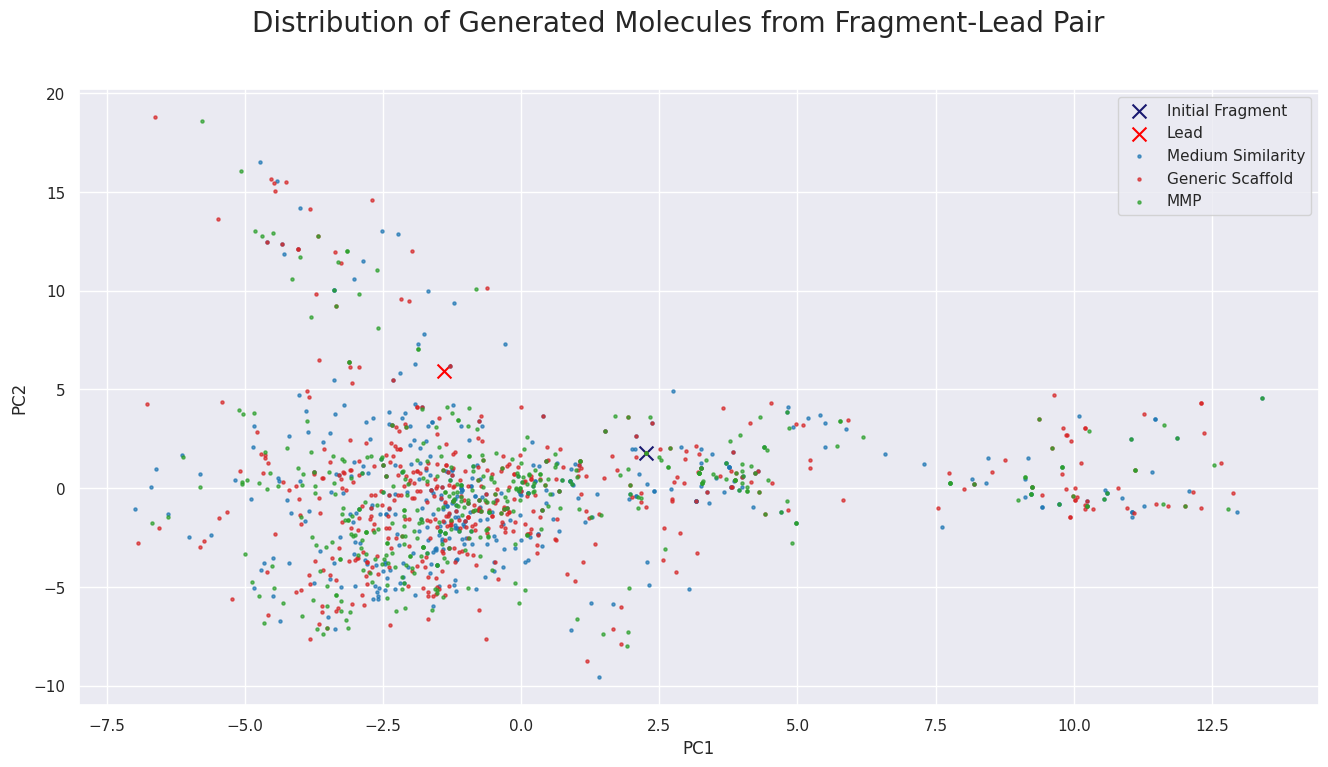

In [168]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))

ax.scatter(pca_fps.T[0][0], pca_fps.T[1][0], s=100, c='midnightblue', marker='x', label='Initial Fragment')
ax.scatter(pca_fps.T[0][-1], pca_fps.T[1][-1], s=100, c='red', marker='x', label='Lead')

ax.scatter(medium_sim['PC1'], medium_sim['PC2'], s=5, c='tab:blue', label='Medium Similarity', alpha=.7)
# ax.scatter(high_sim['PC1'], high_sim['PC2'], s=5, c='tab:green', label='High Similarity', alpha=.4)
# ax.scatter(sim['PC1'], sim['PC2'], s=5, c='tab:orange', label='Similarity', alpha=.4)
# ax.scatter(scaffold['PC1'], scaffold['PC2'], s=5, c='tab:red', label='Scaffold', alpha=.4)
ax.scatter(scaffold_generic['PC1'], scaffold_generic['PC2'], s=5, c='tab:red', label='Generic Scaffold', alpha=.7)
ax.scatter(mmp['PC1'], mmp['PC2'], s=5, c='tab:green', label='MMP', alpha=.7)



handles, labels = ax.get_legend_handles_labels()
# handles[0] = plt.Line2D([], [], marker='.', color='limegreen', linestyle='None', markersize=5, alpha=1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


ax.legend(handles, labels)

fig.suptitle('Distribution of Generated Molecules from Fragment-Lead Pair', fontsize=20)

# subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'
# ax.set_title(subtitle, fontsize=10, y=1.02);

From this plot, it seems that the model is not generating analogs in the same chemical space as the lead molecule.

## Assessing Binding Affinity

In [130]:
# lead_docking_score = analogs.iloc[0]['Docking score']

In [131]:
# fig = plt.figure(figsize =(10, 7))

# plt.boxplot(analogs['Docking score'], vert=False, patch_artist=True)

# plt.plot(lead_docking_score, 1, 'x', markersize=10, color='red')

# plt.xlabel('Docking Score')

# ax = plt.gca()
# ax.set(yticklabels=[])

# title = f'Distribution of docking scores from fragment-lead pair'
# subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

# fig.suptitle(title)
# plt.title(subtitle, fontsize=10);

## Investigating Tanimoto Similarity

In [132]:
def tanimoto_similarity(smi_1, smi_2, use_counts=False):
    fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048,countSimulation=True)
    mol_1 = Chem.MolFromSmiles(smi_1)
    mol_2 = Chem.MolFromSmiles(smi_2)
    if use_counts:
        fp_1 = rdFingerprintGenerator.GetCountFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetCountFPs([mol_2])[0]
    else:
        fp_1 = rdFingerprintGenerator.GetFPs([mol_1])[0]
        fp_2 = rdFingerprintGenerator.GetFPs([mol_2])[0]
    return DataStructs.TanimotoSimilarity(fp_1, fp_2)

In [133]:
similarities_to_lead = [tanimoto_similarity(analog, lead_smiles, True) for analog in analogs['SMILES'].values]

In [134]:
analogs['sim_to_lead'] = similarities_to_lead

In [135]:
analogs.sort_values('sim_to_lead', ascending=False, inplace=True)

analogs

,SMILES,Input_SMILES,Tanimoto,Prior,sim_to_lead
0,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1,Nc1cc(c[nH]c1=O)C(F)(F)F,NaN,NaN,1.000000
1055,Cc1cccc(-c2c[nH]c(=O)c(N)c2)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.400000,mmp,0.317647
1058,Nc1cc(-c2cccc(C(F)(F)F)c2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,NaN,medium_similarity,0.293478
2080,Nc1cc(-c2cccc(C(F)(F)F)c2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.682927,similarity,0.293478
2151,Nc1cc(-c2ccc(F)cc2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.360000,medium_similarity,0.287356
...,...,...,...,...,...
2289,Nc1ncc(C(F)(F)F)cc1C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.344262,similarity,0.069307
1604,Nc1[nH]cnc1C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.375000,mmp,0.066667
1576,Nc1csc(C(F)(F)F)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.454545,similarity,0.066667
2231,Nc1scc(C(F)(F)F)c1N,Nc1cc(C(F)(F)F)c[nH]c1=O,0.446429,mmp,0.065217


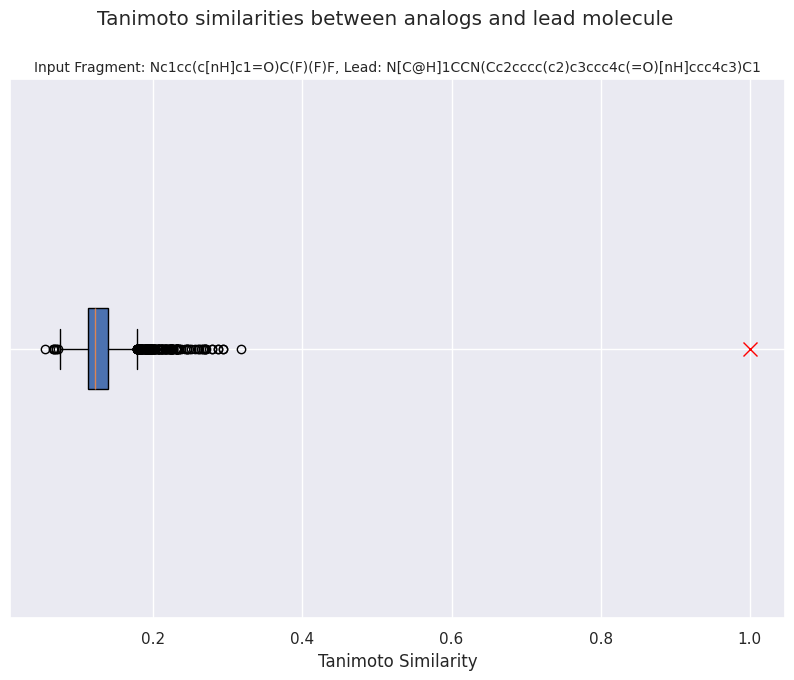

In [136]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(analogs['sim_to_lead'][1:], vert=False, patch_artist=True)

plt.plot(analogs['sim_to_lead'][0], 1, 'x', markersize=10, color='red')

plt.xlabel('Tanimoto Similarity')

ax = plt.gca()
ax.set(yticklabels=[])

title = f'Tanimoto similarities between analogs and lead molecule'
subtitle = f'Input Fragment: {initial_fragment_smiles}, Lead: {lead_smiles}'

fig.suptitle(title)
plt.title(subtitle, fontsize=10);

### Breaking it down by prior

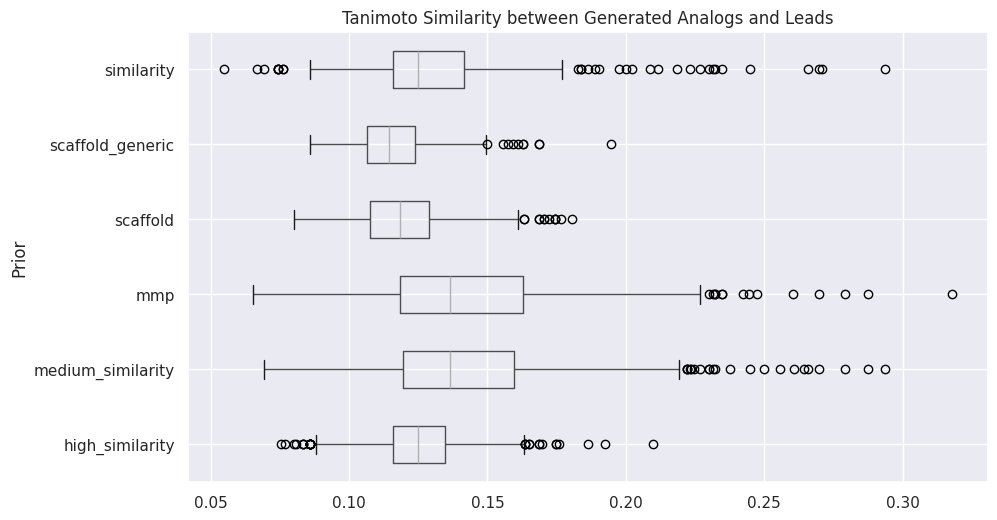

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))

params = {'vert' : 0}

analogs[1:].boxplot(column='sim_to_lead', by='Prior', ax=ax, **params)

fig.suptitle('')
ax.set_title('Tanimoto Similarity between Generated Analogs and Leads');

## MORE MOLECULES

In [149]:
initial_fragment_smiles, lead_smiles = fragment_lead_pairs['Fragment'], fragment_lead_pairs['Lead']

In [150]:
for frag, lead in zip(initial_fragment_smiles, lead_smiles):

    frag += '\n'
    
    f = open("data/mol2mol.smi", "a")
    f.write(frag)
    f.close()

In [151]:
analogs

,SMILES,Input_SMILES,Tanimoto,Prior,sim_to_lead
0,N[C@H]1CCN(Cc2cccc(c2)c3ccc4c(=O)[nH]ccc4c3)C1,Nc1cc(c[nH]c1=O)C(F)(F)F,NaN,NaN,1.000000
1055,Cc1cccc(-c2c[nH]c(=O)c(N)c2)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.400000,mmp,0.317647
1058,Nc1cc(-c2cccc(C(F)(F)F)c2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,NaN,medium_similarity,0.293478
2080,Nc1cc(-c2cccc(C(F)(F)F)c2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.682927,similarity,0.293478
2151,Nc1cc(-c2ccc(F)cc2)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.360000,medium_similarity,0.287356
...,...,...,...,...,...
2289,Nc1ncc(C(F)(F)F)cc1C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.344262,similarity,0.069307
1604,Nc1[nH]cnc1C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.375000,mmp,0.066667
1576,Nc1csc(C(F)(F)F)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.454545,similarity,0.066667
2231,Nc1scc(C(F)(F)F)c1N,Nc1cc(C(F)(F)F)c[nH]c1=O,0.446429,mmp,0.065217


<Axes: >

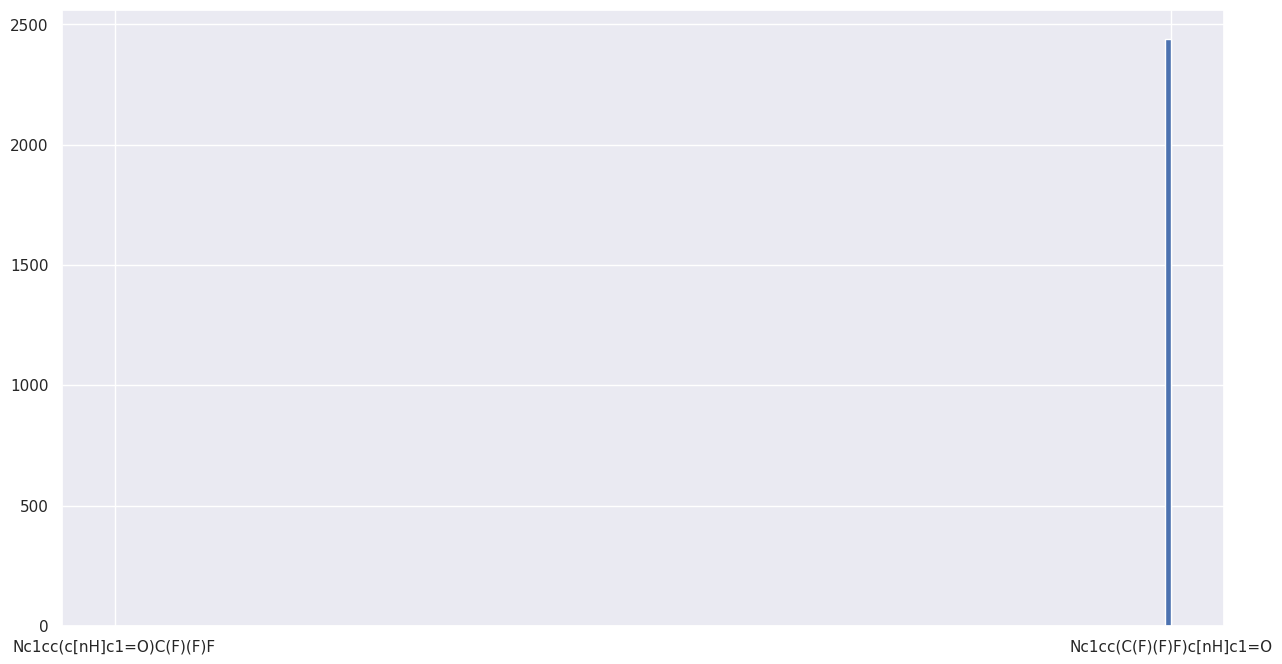

In [152]:
analogs['Input_SMILES'].hist(bins=164)